## K-MEANS PARA GEOCLUSTERIZAÇÃO DESCRITIVA DE ÁREAS NO BRASIL BASEADO NOS INDICADORES: IPM, IDH-M, IBEU E IVS

In [1]:
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
#Dados dos municípios
dataMun = pd.read_excel("MunicipioBrasil_20230102.xlsx")

#Dados de geolocalização - latitude e longitude dos municípios - fonte dos dados ao final do arquivo.
munLATLONG = pd.read_csv("municipios_LATLONG.csv")

In [3]:
#Renomeação de colunas para execução do merge entre os dados de município e geolocalização
dataMun = dataMun.rename(columns={'cod_mun': 'codigo_ibge'})

In [4]:
#Avaliação dos dados - aqueles municípios sem localização nos dados dataMun serão descartados.
#Base de dados original enriquecida com os dados de geolocalização via merge.
df = dataMun.merge(munLATLONG, on='codigo_ibge')

In [5]:
#Seleção dos indicadores a serem utilizados e a geolocalização
df = df[['latitude','longitude','IPM','num_idhm','num_ivs','num_ibeu']]

In [6]:
# Remover linhas com valores ausentes
df.dropna(inplace=True)

In [7]:
#Normalização do IPM - min max - valores de 0 a 1 
df['IPM']=(df['IPM']-df['IPM'].min())/(df['IPM'].max()-df['IPM'].min())

In [8]:
#Visualização dos dados que serão utilizados para o modelo
df.describe()

latitude    longitude          IPM     num_idhm      num_ivs  \
count  5565.000000  5565.000000  5565.000000  5565.000000  5565.000000   
mean    -16.444467   -46.226327     0.271352     0.659157     0.351680   
std       8.283924     6.409211     0.172530     0.071997     0.130164   
min     -33.686600   -72.899700     0.000000     0.418000     0.090000   
25%     -22.841700   -50.869900     0.129879     0.599000     0.246000   
50%     -18.087300   -46.516500     0.257379     0.665000     0.335000   
75%      -8.496410   -41.405200     0.384255     0.718000     0.448000   
max       4.603140   -32.410700     1.000000     0.862000     0.784000   

          num_ibeu  
count  5565.000000  
mean      0.772293  
std       0.083298  
min       0.444000  
25%       0.720000  
50%       0.778000  
75%       0.833000  
max       0.951000

In [9]:
#Função criada para retirada de outliers - foi aplicado nos dataframes após retirada de valores nulos
def remove_outliers(df, threshold=3):
    """
    Remove outliers de um dataframe.

    Args:
        df: Dataframe com os dados.
        threshold: Threshold para identificação de outliers baseado em z-score.
    
    Returns:
        Dataframe sem outliers.
    """

    # Identifique os outliers em cada coluna
    outliers = []
    for col in df.columns:
        # Use o método do z-score para identificar os outliers
        z_scores = df[col].apply(lambda x: abs(x - df[col].mean()) / df[col].std())
        outliers.extend(df[z_scores > threshold].index.tolist())

    # Remova os outliers do dataframe
    df = df.drop(outliers)

    return df
df = remove_outliers(df)

In [10]:
#Após a retirada de outliers
df.describe()

latitude    longitude          IPM     num_idhm      num_ivs  \
count  5483.000000  5483.000000  5483.000000  5483.000000  5483.000000   
mean    -16.618519   -46.025000     0.264687     0.660898     0.347610   
std       8.211184     6.112209     0.164003     0.070768     0.126214   
min     -33.686600   -65.334600     0.000000     0.453000     0.090000   
25%     -22.889400   -50.780750     0.128192     0.601000     0.245000   
50%     -18.374100   -46.388300     0.253311     0.667000     0.331000   
75%      -8.785460   -41.315400     0.377753     0.718000     0.443000   
max       4.603140   -32.410700     0.781456     0.862000     0.741000   

          num_ibeu  
count  5483.000000  
mean      0.775038  
std       0.080502  
min       0.525000  
25%       0.723000  
50%       0.780000  
75%       0.834000  
max       0.951000

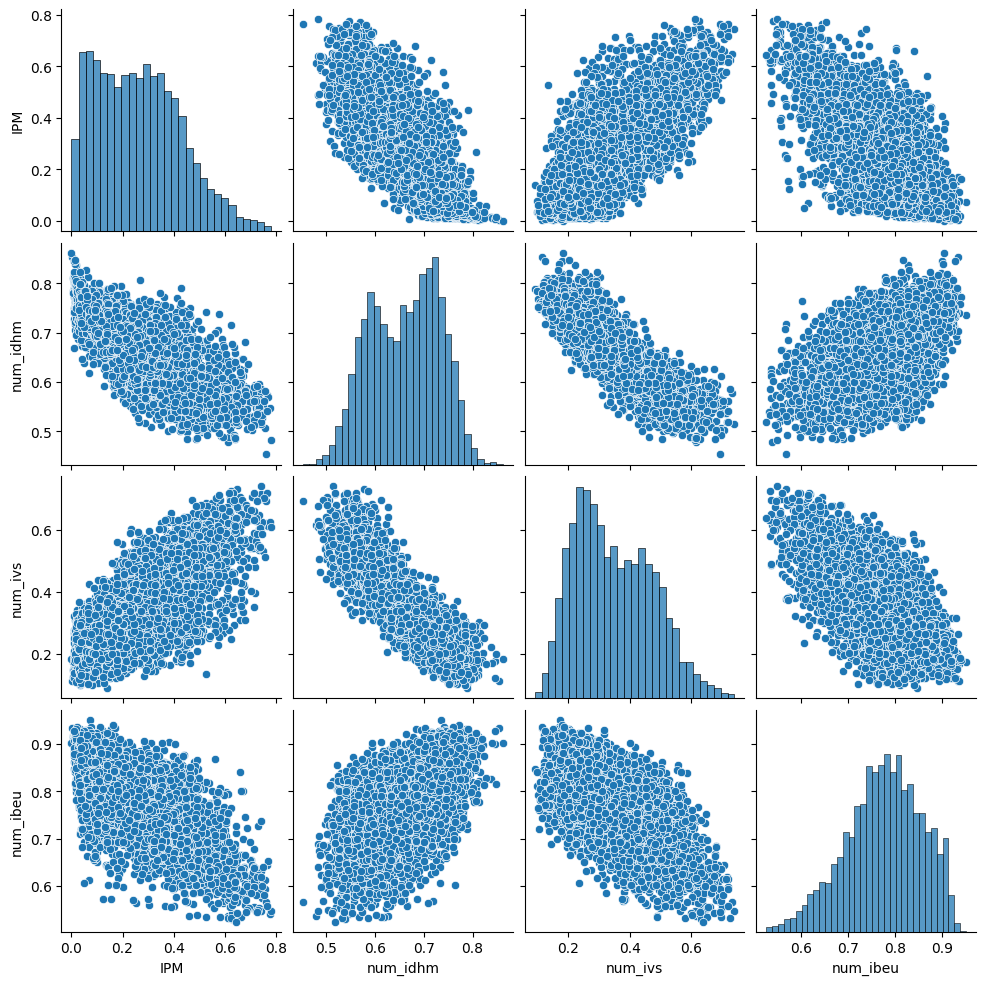

In [11]:
#Plotagem pairplot dos indicadores dos dados municipais para verificar a distribuição entre dos indicadores do dataframe
indicadores = df[['IPM','num_idhm','num_ivs','num_ibeu']]
sns.pairplot(indicadores)

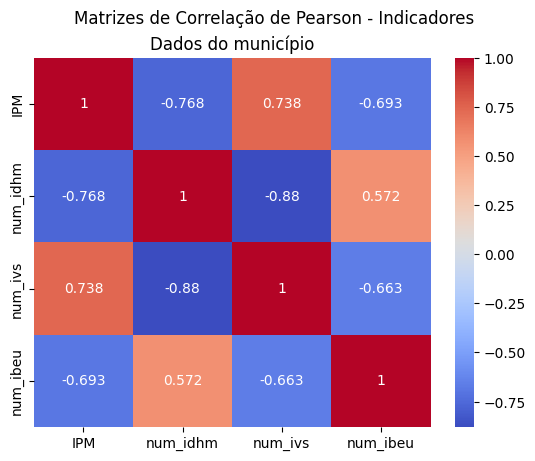

In [12]:
#Corte Geográfico - Correlação de Pearson
corr_matrix = pd.DataFrame.corr(indicadores)

# Matrizes - duas casas decimais, mapa de calor, com valores representados
sns.heatmap(corr_matrix,  fmt='.3g', cmap='coolwarm',annot=True).set_title("Dados do município")
plt.suptitle('Matrizes de Correlação de Pearson - Indicadores')
plt.show()

## GEOCLUSTERIZAÇÃO

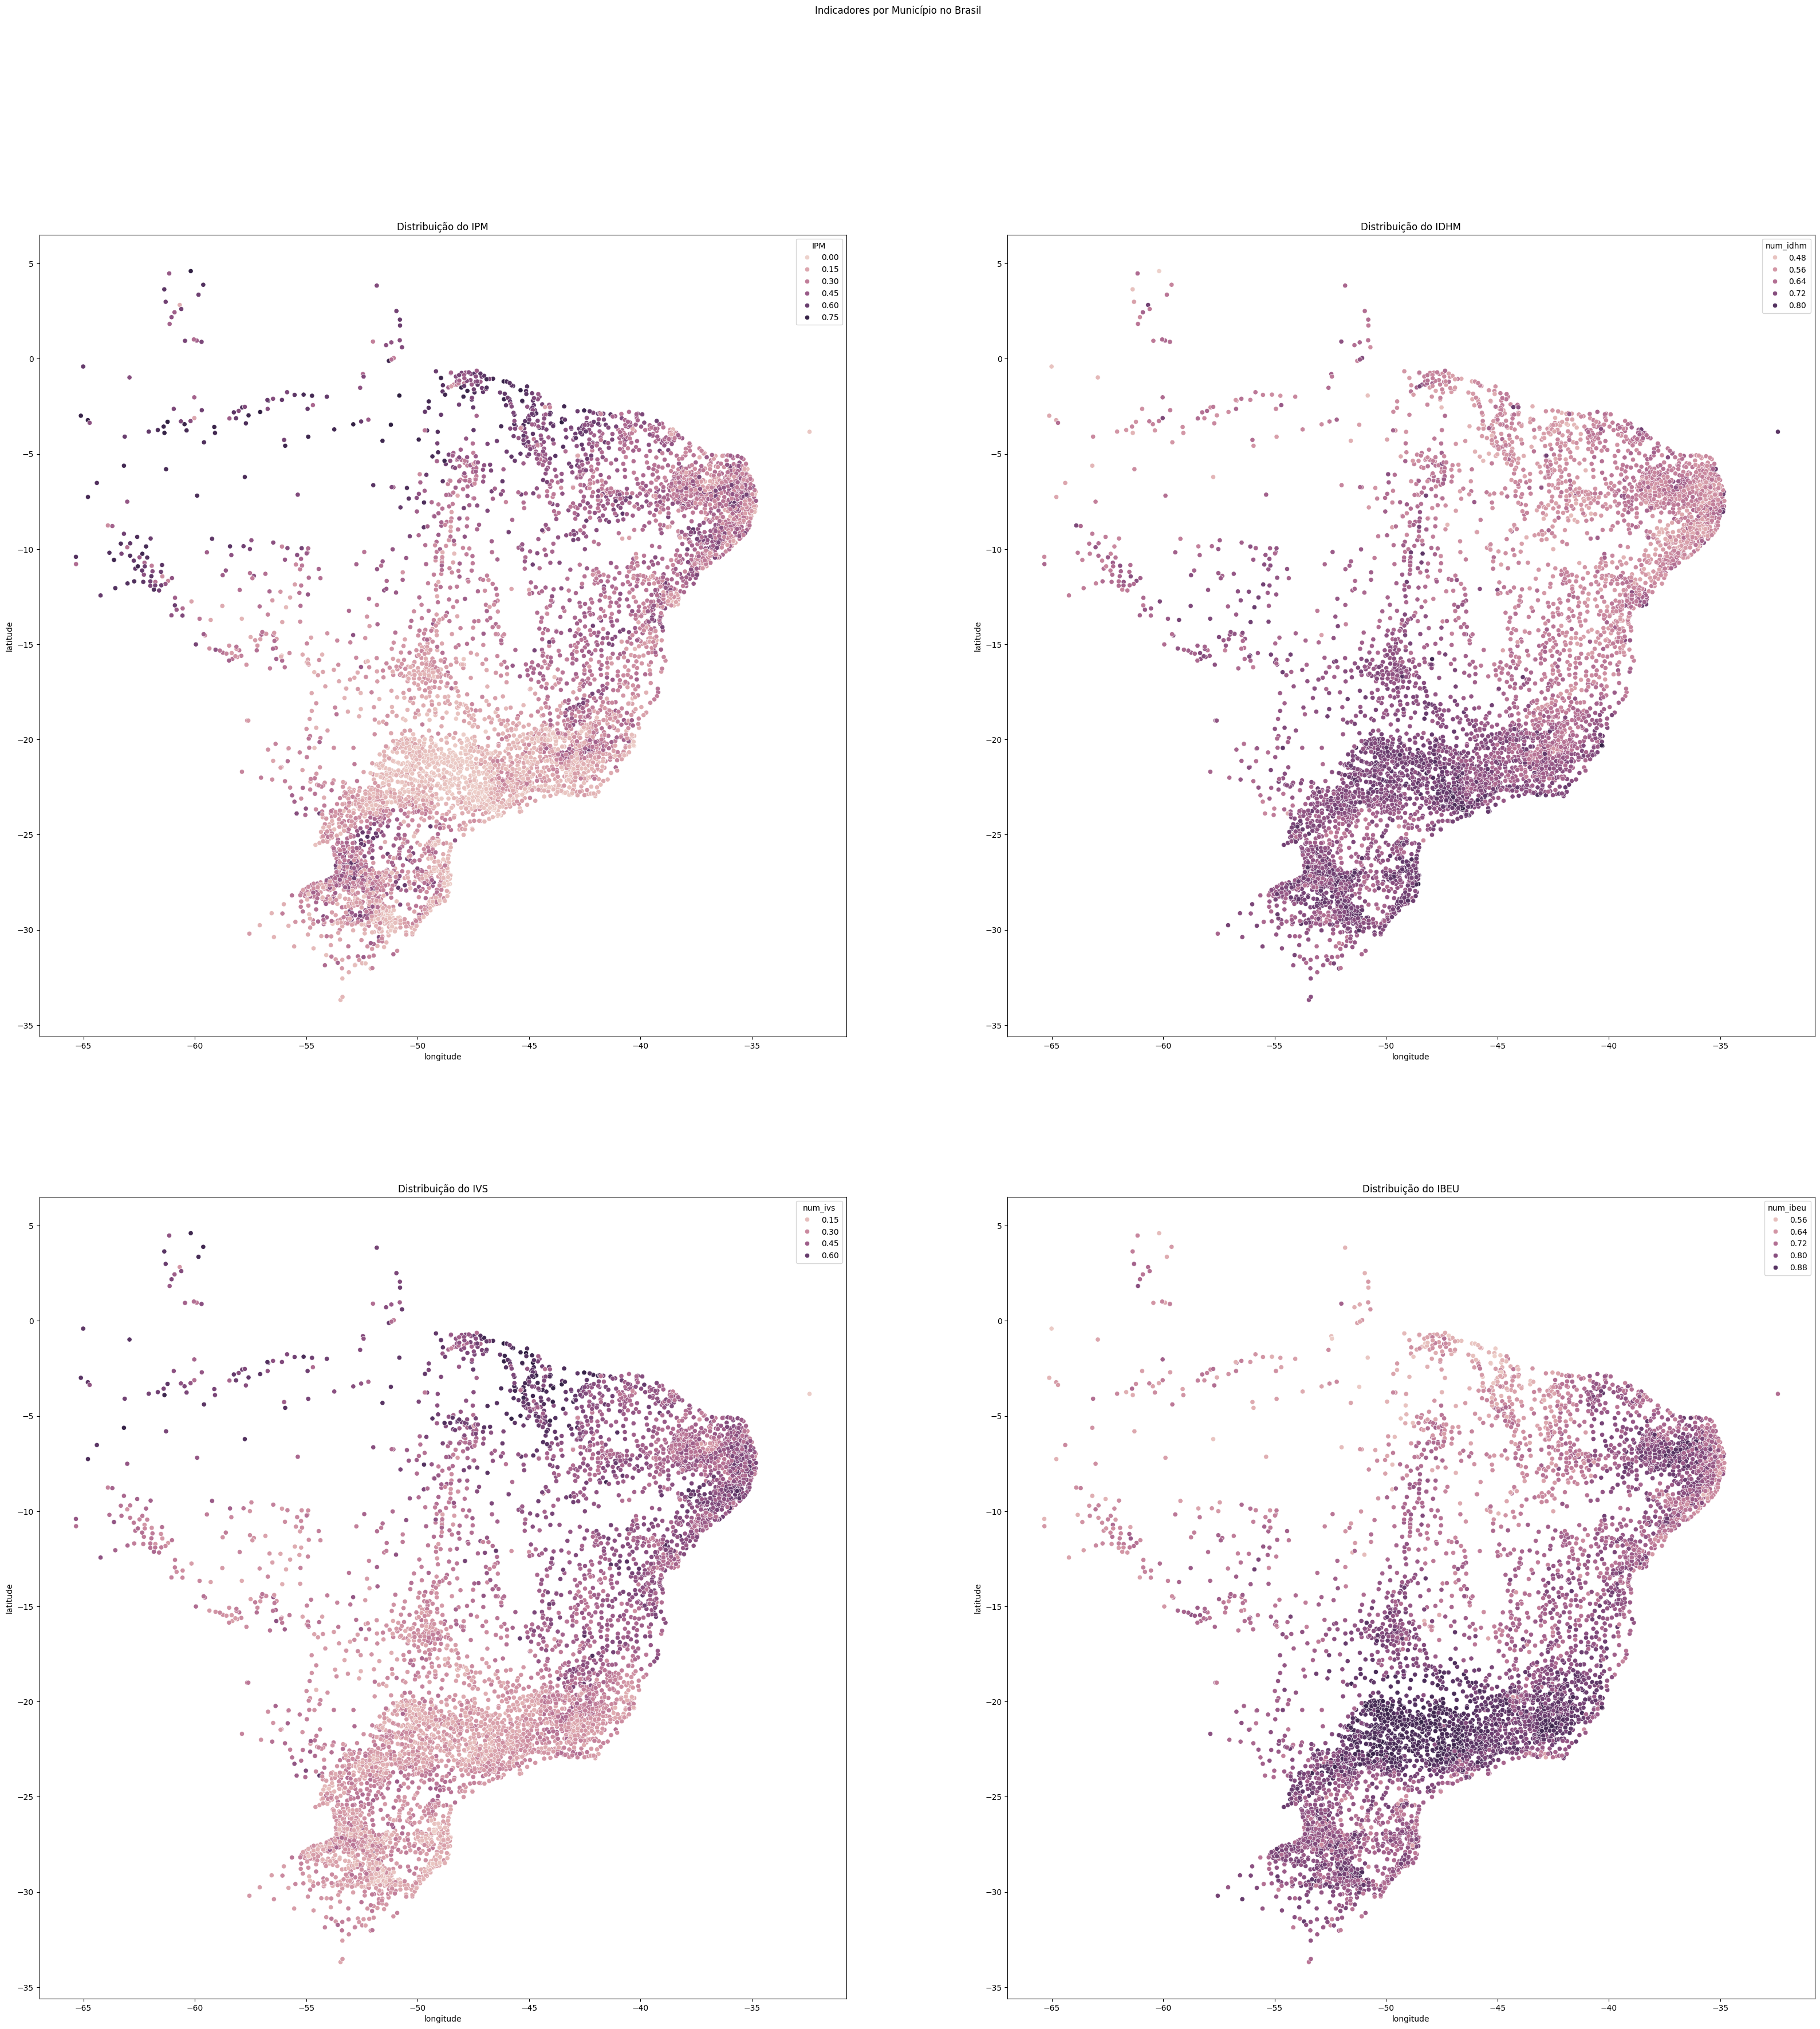

In [13]:
#Distribuição dos indicadores ao longo do país

import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(40, 40))
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'IPM', ax=axes[0,0], ).set_title("Distribuição do IPM")
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'num_idhm', ax=axes[0,1]).set_title("Distribuição do IDHM")
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'num_ivs', ax=axes[1,0]).set_title("Distribuição do IVS")
sns.scatterplot(data = df, x = 'longitude', y = 'latitude', hue = 'num_ibeu', ax=axes[1,1]).set_title("Distribuição do IBEU")
plt.suptitle('Indicadores por Município no Brasil')
plt.show()

In [14]:
#Necessidade de normalizar osd dados de localidade - min max - 0 a 1 
df['latitude']=(df['latitude']-df['latitude'].min())/(df['latitude'].max()-df['latitude'].min())
df['longitude']=(df['longitude']-df['longitude'].min())/(df['longitude'].max()-df['longitude'].min())
#atributos = df[['latitude','longitude']]
#localidades = df[['IPM','num_idhm','num_ivs','num_ibeu']]
print(df)

      latitude  longitude       IPM  num_idhm  num_ivs  num_ibeu
0     0.568254   0.101425  0.542817     0.641    0.376     0.625
1     0.621077   0.069922  0.345086     0.702    0.268     0.709
2     0.527350   0.145262  0.534114     0.650    0.300     0.665
3     0.581156   0.117799  0.235062     0.718    0.255     0.776
4     0.535381   0.137219  0.443816     0.692    0.280     0.674
...        ...        ...       ...       ...      ...       ...
5560  0.442575   0.510836  0.190204     0.712    0.271     0.755
5561  0.416676   0.471691  0.130899     0.684    0.415     0.724
5562  0.487021   0.555299  0.226406     0.647    0.384     0.740
5563  0.476169   0.499719  0.345025     0.634    0.281     0.734
5564  0.467674   0.528640  0.034704     0.824    0.294     0.813

[5483 rows x 6 columns]


In [15]:
from sklearn.metrics import silhouette_score

#Elbow Method - Processo de análise para determinar qual o número ideal de clusters
K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(df)
    
    # append the model to fits
    fits.append(model)
    
    # Append the silhouette score to scores
    score.append(silhouette_score(df, model.labels_, metric='euclidean'))

[Text(0.5, 1.0, 'Elbow Method - Análise da pontuação do Silhouette Score')]

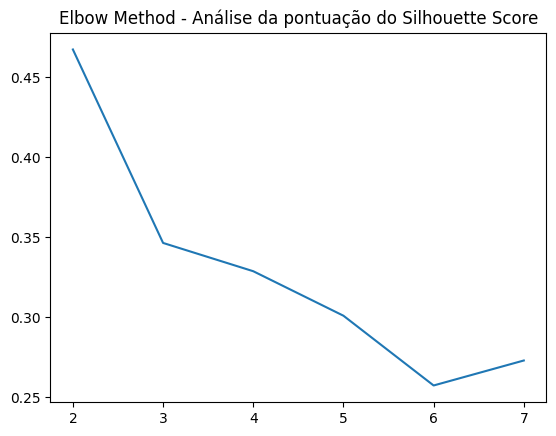

In [16]:
#Elbow Method - Visualização de silhouette score vs número de clusters
sns.lineplot(x = K, 
             y = score).set(title='Elbow Method - Análise da pontuação do Silhouette Score')

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

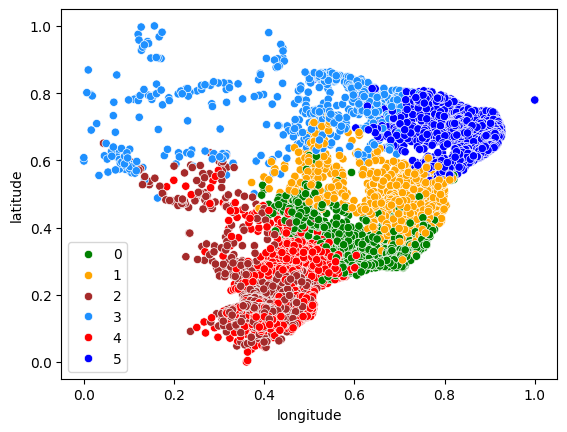

In [17]:
#Resultado da clusterização, tendo em vista os 4 indicadores, o país está dividido em 6 clusters - K = 6
#ATENÇÃO - OS DADOS DE GEOLOCALIZAÇÃO ESTÃO NORMALIZADOS, mas a representação persiste.

sns.scatterplot(
    data = df, 
    x = 'longitude', 
    y = 'latitude', 
    hue = fits[4].labels_,
    palette=['green','orange','brown','dodgerblue','red','blue'])

## Análise da Composição dos Clusters

In [18]:
#Resgate do modelo com 6 clusters - é o mesmo modelo da imagem do mapa acima
model = KMeans(n_clusters = 6, random_state = 0, n_init='auto').fit(df)

In [19]:
#Adição dos labels do modelo para os dados para que se possa analisar a composição dos clusters e seus indicadores
model= pd.DataFrame(model.labels_)
model = model.rename(columns={0: 'Class_cluster'})
df_model = pd.concat([model, df], axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[Text(0.5, 1.0, 'Análise da composição dos clusters - IBEU')]

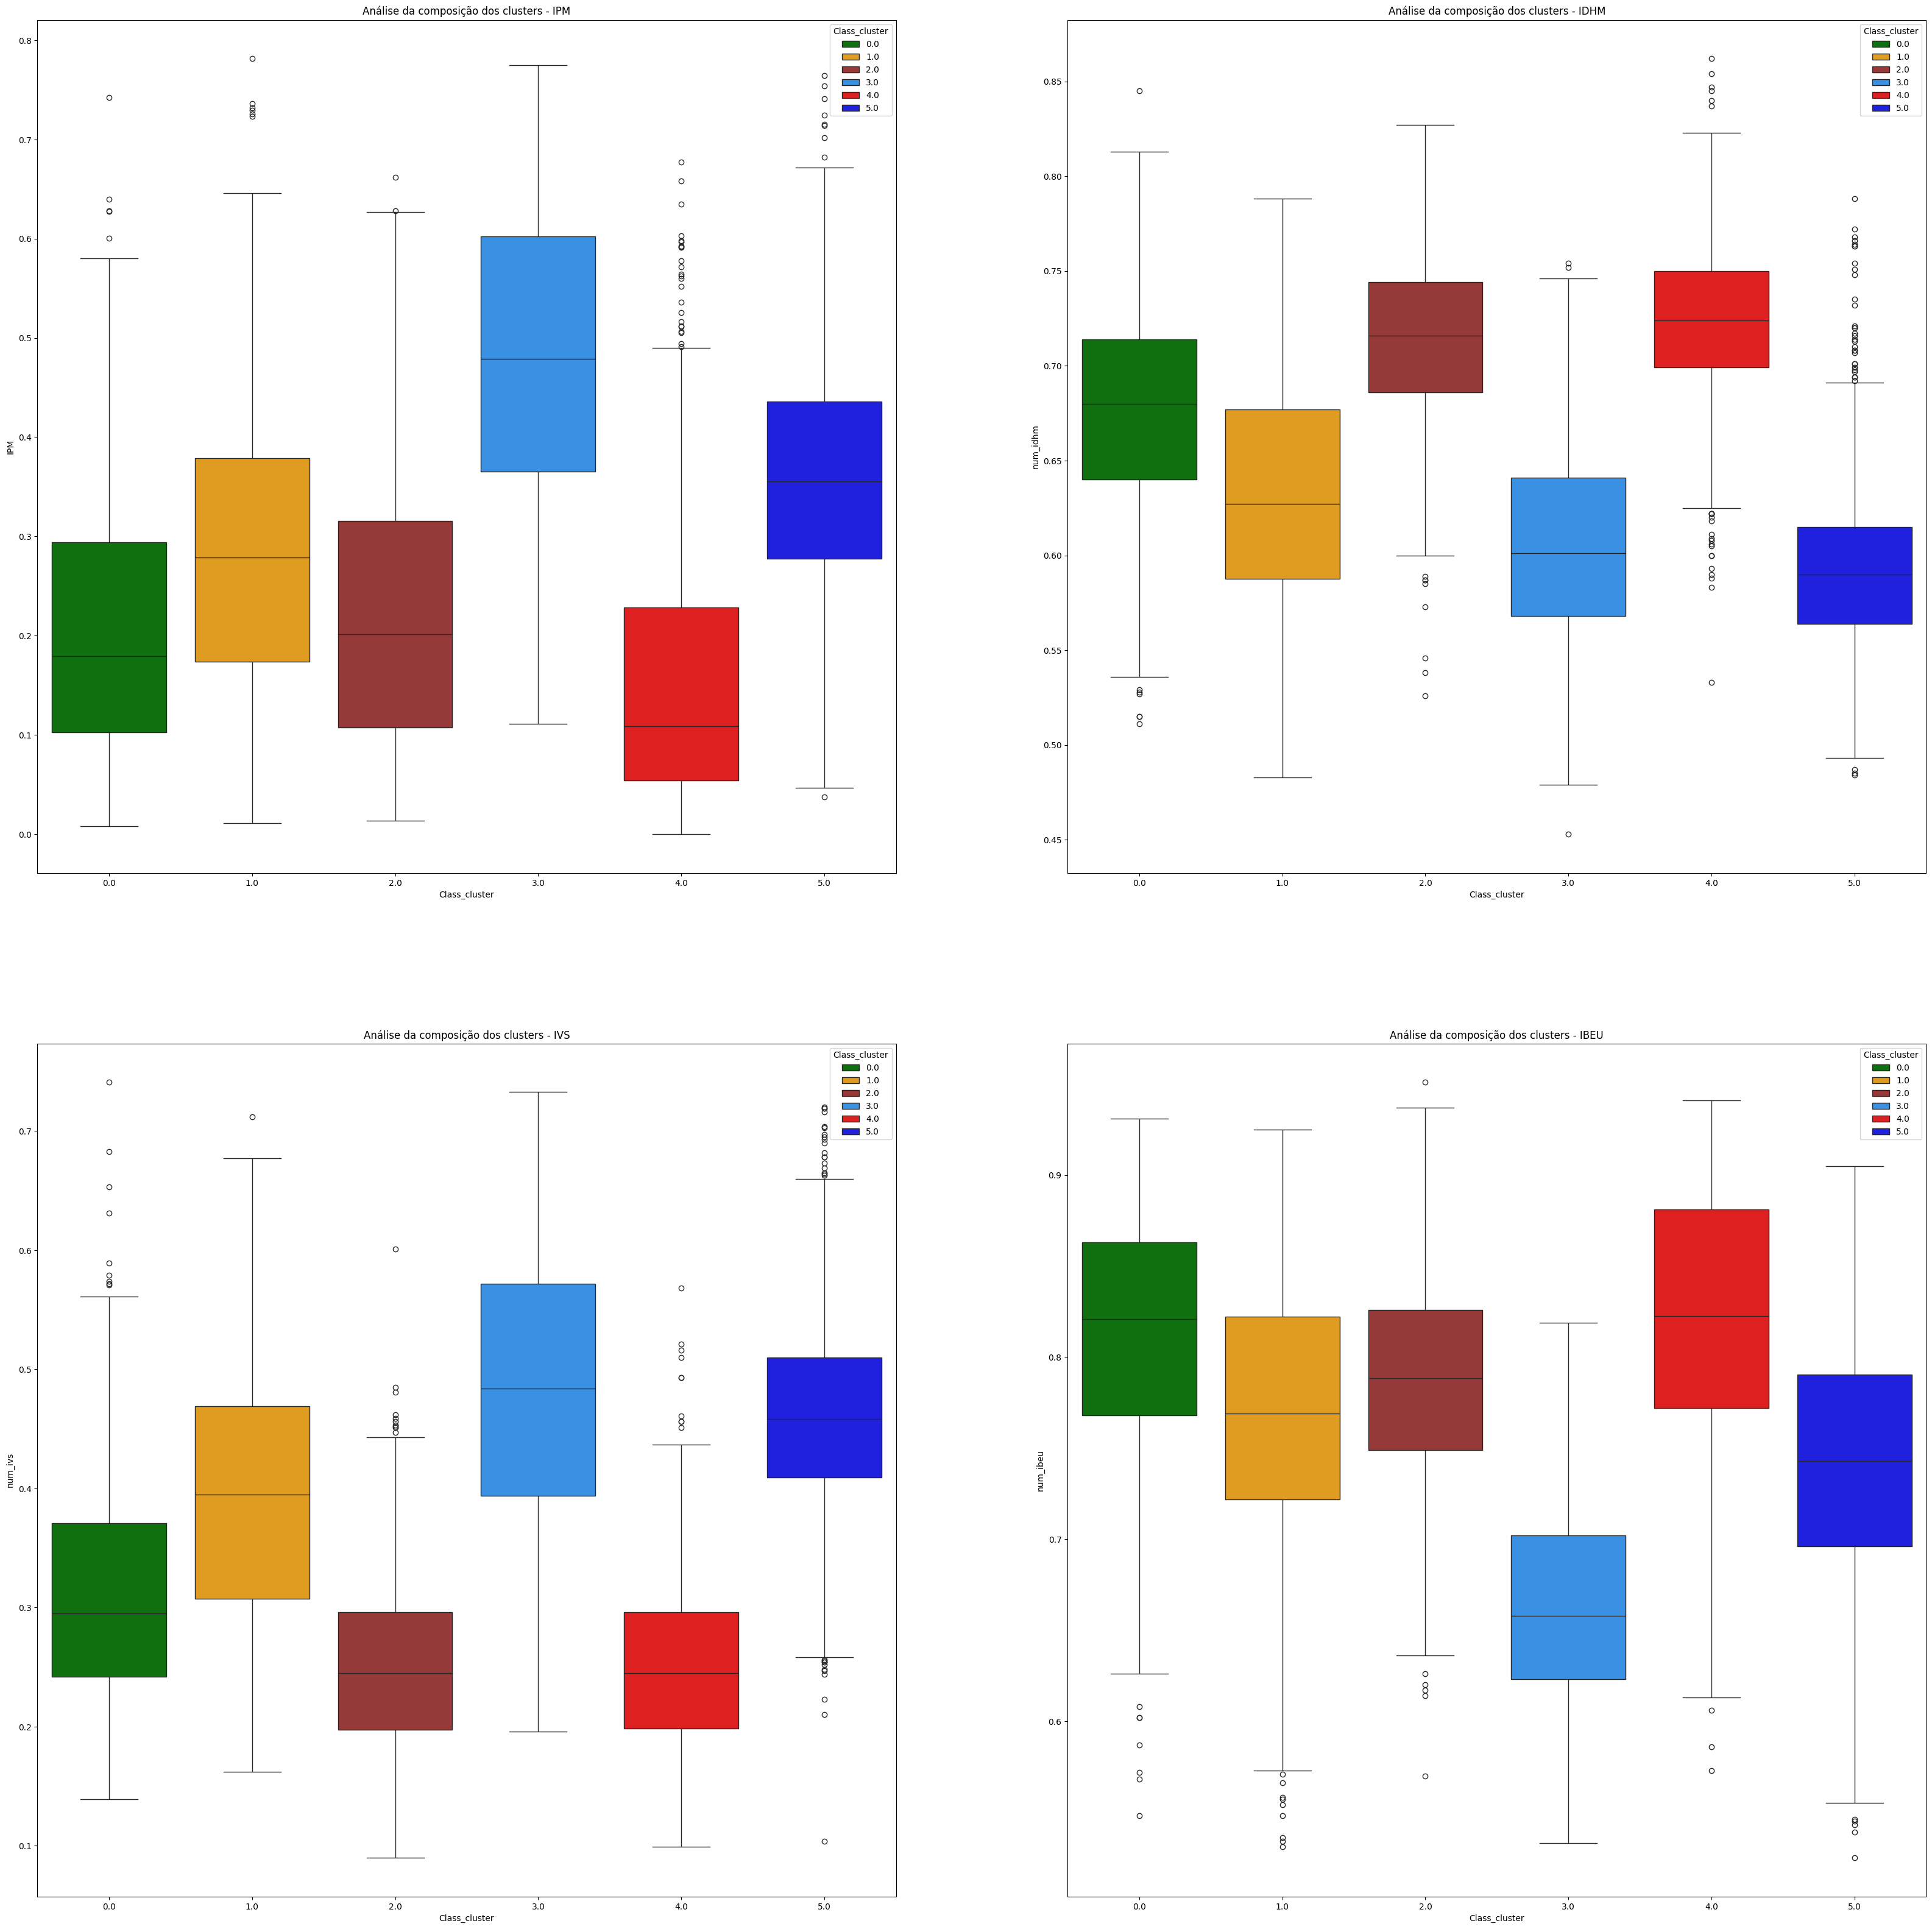

In [20]:
#Visualização da composição dos clusters pelos indicadores apresentados
fig, axes = plt.subplots(2, 2, figsize=(40, 40))
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)

sns.boxplot(data = df_model,
            x = 'Class_cluster', 
            y = df_model['IPM'], 
            hue = 'Class_cluster',
            ax=axes[0,0],
            palette=['green','orange','brown','dodgerblue','red','blue']).set(title='Análise da composição dos clusters - IPM')

sns.boxplot(data = df_model,
            x = 'Class_cluster', 
            y = df_model['num_idhm'], 
            hue = 'Class_cluster',
            ax=axes[0,1],
            palette=['green','orange','brown','dodgerblue','red','blue']).set(title='Análise da composição dos clusters - IDHM')

sns.boxplot(data = df_model,
            x = 'Class_cluster', 
            y = df_model['num_ivs'], 
            hue = 'Class_cluster',
            ax=axes[1,0],
            palette=['green','orange','brown','dodgerblue','red','blue']).set(title='Análise da composição dos clusters - IVS')

sns.boxplot(data = df_model,
            x = 'Class_cluster', 
            y = df_model['num_ibeu'], 
            hue = 'Class_cluster',
            ax=axes[1,1],
            palette=['green','orange','brown','dodgerblue','red','blue']).set(title='Análise da composição dos clusters - IBEU')

### Ressalta-se que é necessário uma avaliação crítica de um especialista de domínio para avaliação do comportamento dos indicadores frente a composição de cada cluster [0, 1, 2, 3, 4, 5 ]. Já que os fatores que apontam tanto para a pobreza quanto ao desenvolvimento são multidimensionais. <br>

Contudo pode-se supor, tendo-se em vista os indicadores de IPM, IVS, IDHM e IBEU e as distribuições dos dados apresentados: <br>

    Os clusters 0 - Verde, 2 - Bonina e 4 - Vermelho são locais com menos pobreza e mais desenvolvimento.
    O cluster 1 - Amarelo, seria com pobreza e desenvolvimento medianos. 
    Os clusters 3 - Azul e 5 - Azul-Escuro são locais com mais pobreza e menos desenvolvimento. 

Por fim, caso sejam obtidos dados do último censo com a mesma metodologia dos dados oferecidos pelo NIS - PUCMinas será possível implementar o mesmo modelo de forma que se possa visualizar a mudança desse quadro de 2010 até os dados do último censo.

Links e fontes para compreensão dos daods:

Entendimento do IPM: <br>
https://nis.org.br/indice-de-pobreza-multidimensional/ <br>
https://ophi.org.uk/multidimensional-poverty-index/ <br>
https://www.undp.org/pt/brazil/news/%C3%ADndice-de-pobreza-revela-grandes-desigualdades-entre-grupos-%C3%A9tnicos<br>

Entendimento do IDH e IDHM: <br>
https://rpm.org.br/cdrpm/67/8.html <br>
https://repositorio.ipea.gov.br/bitstream/11058/8182/1/Atlas%20do%20desenvolvimento%20humano%20nas%20regi%C3%B5es%20metropolitanas%20brasileiras.pdf <br>

Entendimento do IVS: <br>
http://ivs.ipea.gov.br/images/publicacoes/Ivs/publicacao_atlas_ivs.pdf <br>

Entendimento do IBEU: <br>
https://ibeu.observatoriodasmetropoles.net.br/wp-content/uploads/2021/03/IBEU-MUNICIPAL_FINAL.pdf <br>

Fontes de dados de latitude e longitude dos municípios: <br> 
https://github.com/kelvins/Municipios-Brasileiros <br> 

Artigo do Método CAPTO: <br> 
https://www.researchgate.net/profile/Luis-Zarate-8/publication/373287824_CAPTO_-_A_method_for_understanding_problem_domains_for_data_science_projects_CAPTO_-_Um_metodo_para_entendimento_de_dominio_de_problema_para_projetos_em_ciencia_de_dados/links/64e9f2040453074fbdb4386a/CAPTO-A-method-for-understanding-problem-domains-for-data-science-projects-CAPTO-Um-metodo-para-entendimento-de-dominio-de-problema-para-projetos-em-ciencia-de-dados.pdf <br>
